# Punktpartikkel i 2D

### FY1003 Elektrisitet og Magnetisme - Numerisk Øving 1

Det elektriske felt og potensial for en punktpartikkel er allerede kjent i vilkårlig dimensjon. Hensikten med denne øvingen er å lære hvordan man håndterer numerikk i flere dimensjoner, både mht. de forskjellige metodene som fins for å plotte 2-dimensjonale systemer, og bruk av meshgrids. Det forventes at bruk av 1-dimensjonale arrays er kjent fra tidligere. 

### Oppgave 1: Elektrisk Potensial

Fra Coloumbs lov er det kjent at det elektriske potensialet i 2 dimensjoner en avstand,
\begin{equation}
r = \sqrt{x^2 + y^2}
\end{equation}
fra en punktpartikkel med ladning $q$ er gitt ved 
\begin{equation}
V(r) = \frac{q}{4\pi \epsilon_0}\frac{1}{r}\text{,}
\end{equation}
hvor $\epsilon_0$ er den elektriske permittivitet i vakum. Første del av øvingen vil gå ut på å plotte dette potensialet for en punktpartikkel med ladning $q = e$ plassert i origo, mellom $\pm L = \pm 10\text{nm}$.

$\textbf{a)}$ Ofte når man jobber med numerikk er det hensiktsmessig å innføre nye dimensjonsløse variabler, f.eks. $v/c$ hvis man jobber med hastigheter nær lysets hastighet, eller $V/V_0$ om man jobber med et konstant potensial. Utfør et slikt variabelskifte på potensialet og posisjonen slik at de blir dimensjonsløse.

------------

Jeg gjør valget å gjøre om formelene til å gi en verdi relativt til en satt standard. Jeg setter da at posisjonen settes til å være hvor mange ganger lengre unna punktladningen punktet vi ser på er, slik at
\begin{equation} R = \frac{r}{r_0},\quad r=\sqrt{x^2+y^2}, \quad r_0 = 1 \mu m \end{equation}
For potensialet gjør jeg det samme og sammenligner da med potensialet i avstand 1 mikrometer fra punktladningen. 
\begin{equation} P = \frac{V}{V_0},\quad V=\frac{q}{4\pi \epsilon_0}\frac{1}{r}\text, \quad V_0 \sim 1.438*10^{-3} J/C  \end{equation}



----------------

$\textbf{b)}$ For å løse problemer i to dimensjoner er det nødvendig med en ny måte å diskretisere koordinatene. Det er ikke lenger tilstrekkelig med éndimensjonale $1 \times n$ arrays. Vi trenger enten en $n \times n$ array hvor hvert punkt er en 2-dimensjonal vektor, eller en separat $n \times n$ array for hver akse. I denne øvingen skal vi bruke den sistnevnte metoden, ved å bruke $\texttt{numpy}$s $\texttt{meshgrid}$ funksjon.

Bruk $\texttt{np.meshgrid}$ til å generere to variabler, $\texttt{xv}$ og $\texttt{yv}$, som inneholder $x$ og $y$ koordinater respektivt.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

x = np.linspace(-4, 4, 17)
 
# numpy.linspace creates an array of
# 9 linearly placed elements between
# -4 and 4, both inclusive
y = np.linspace(-4, 4, 17)
 
# The meshgrid function returns
# two 2-dimensional arrays
xv, yv = np.meshgrid(x, y)



$\textbf{c)}$ Via bruk av array-operasjoner, lag en variabel $\texttt{V}$ som inneholder potensialet $V$ for alle $x$ og $y$. Merk at det her vil oppstå en singularitet i $\vec{r} = 0$ som må tas stilling til. En måte å håndtere dette problemet er å sette verdien for potensialet over en viss grense lik konstant, f.eks. $\texttt{V[}>\texttt{c]} = \texttt{c}$.

In [2]:
#V = np.zeros(shape=(9,9))
q = 1.60*10**(-19)
epsi = 8.854*10**(-12)

r = np.sqrt(xv**2+yv**2)
V = q/(4*math.pi*epsi*r)

#for i in range(0,len(x_1)):
#    for j in range(0,len(x_1[i])):
#        if x_1[i][j]==0 and y_1[i][j]== 0:
#            V[i][j] = 1
#        else:
#            r = math.sqrt(x_1[i][j]**2+y_1[i][j]**2)
#            V[i][j] =  q/(4*math.pi*epsi*r)




/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


$\textbf{d)}$ Plot det dimensjonsløse potensialet $V$ både som en heatmap og som en 3d overflate.

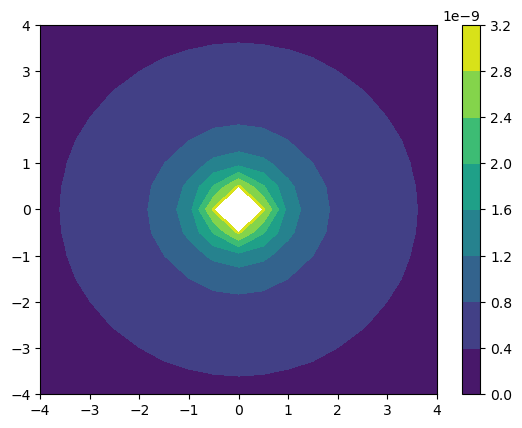

NameError: name 'surf' is not defined

/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/colors.py:973: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/srv/conda/envs/notebook/lib/python3.7/site-packages/mpl_toolkits/mplot3d/proj3d.py:152: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


In [3]:
plt.contourf(xv, yv, V)
  
plt.colorbar()
plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(xv, yv, V, cmap ='viridis', edgecolor ='green')


fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

### Oppgave 2: Elektrisk Felt

Det elektriske felt for en punktpartikkel er også kjent fra Coloumbs lov, men generelt hvis man vet potensialet kan en finne det elektriske feltet ved å bruke gradienten, $\vec{E}=-\nabla V$. I én dimensjon er gradienten kun en vanlig derivert, og vi får $E(r) = -\frac{\text{d}V(r)}{\text{d}r}$. En kan beregne dette numerisk ved å diskretisere derivasjonen,
\begin{equation}
    E(r_\text{i}) = -\frac{V(r_\text{i+1})-V(r_\text{i-1})}{r_\text{i+1}-r_\text{i-1}}\text{.}
\end{equation}
Dette er et eksempel på en finite difference quotient, mer spesifikt er dette en $\textit{central finite difference quotient}$. 

$\textbf{a)}$ Utled en diskret formulering for gradienten i to dimensjoner med bruk av finite difference quotients.

----------------

Skriv her eller på papir

Jeg må gjøre om på formelen slik at den tar for seg x- og y-verdien i de fire rutene ved siden av punktet jeg skal se på. Resultatet skal være en formel på formen;
\begin{equation}
f(x) = \frac{f(x+h)-f(x-h)}{2h}
\end{equation}
Men siden det er en flerdimensjonal formel blir det litt vanskeliggere.
Dersom jeg kan gå etter antagelsen at;

\begin{equation}
$\grad f = <\frac{df}[dx}(x,y),\frac{df}[dy}(x,y)>$ 
\end{equation}
(https://sites.science.oregonstate.edu/math/home/programs/undergrad/CalculusQuestStudyGuides/vcalc/grad/grad.html)
Med formelen $V(x,y) = \frac{q}{4\pi \epsilon_0 \sqrt{x^2+y^2}}$ får vi $\frac{dV}{dx}=d/dx(q/((4 π) ϵ(0) sqrt(x^2 + y^2))) = -(q x)/(4 π ϵ(0) (x^2 + y^2)^(3/2))$

------------------

$\textbf{b)}$ Lag en funksjon som tar inn et potensial $\texttt{V}$ som argument, regner ut gradienten i hvert punkt, og returnerer det elektriske feltet som to $n-2 \times n-2$ arrays (årsaken til at dimensjonen blir $n-2$ og ikke $n$ er at man ikke kan beregne gradienten på randen med central finite differences, men må da bruke enten det som kalles forward/backward finite differences).

$\textit{Hint:}$ Bruk array slicing for å gjøre koden mer effektiv.

In [49]:
def gradientfunc(V):
    dx, dy = np.gradient(V)




$\textbf{c)}$ Plot det dimensjonsløse elektriske feltet til en punktpartikkel i to dimensjoner ved bruk av $\texttt{matplotlib}$s $\texttt{quiverplot}$.

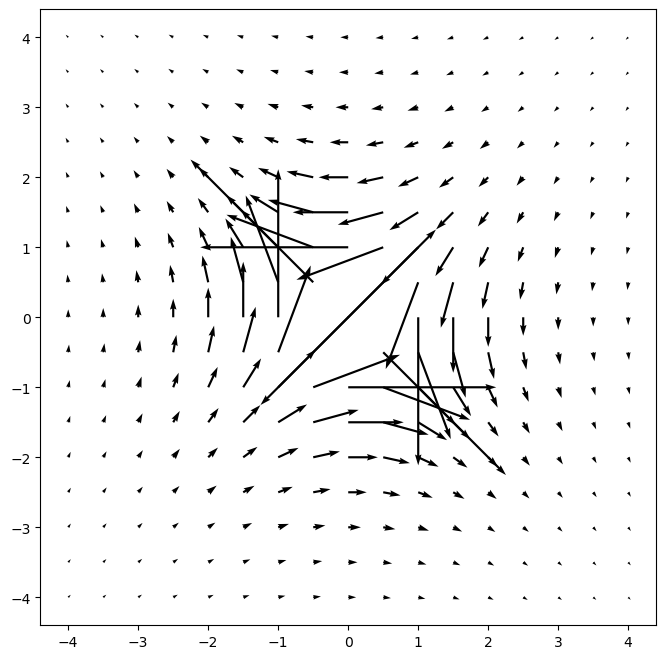

In [51]:
fig1, ax = plt.subplots(figsize =(14, 8))
ax.quiver(xv, yv, dx, dy)
 
ax.set_aspect('equal')
 
# show plot
plt.show()